# 텍스트 예측 분류

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from ckonlpy.tag import Twitter #konlpy twitter는 add_dictionary가 없어서, ckonlpy(customized konlpy) 사용.
twitter = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


# ⑴ 자료 읽어오기

In [3]:
df2 = pd.read_csv('new_data_8529.csv', sep='\t', encoding='UTF-8')

In [4]:
df = df2.loc[df2['대상 선정']=='O',:] # 대상 선정값이 O 인 것만 가져오기 (X제외)

In [5]:
df = df.reindex()

In [6]:
df.columns

Index(['std_clm_type_cd', 'ro_y', 'clm_jgmt_dt', 'ceq_caus_cd', 'ceq_psit_cd',
       'ceq_psit_nm', 'trim_plnt_cd', 'prj_vehl_cd', 'mdl_cd', 'part_sys_cd',
       'repn_part_cd', 'clm_prtl_sbc', '대상 선정', '구분', '책임구', '원인', '검토결과'],
      dtype='object')

In [7]:
df.head(3)

std_clm_type_cd  ro_y  clm_jgmt_dt ceq_caus_cd ceq_psit_cd    ceq_psit_nm  \
12               W  2017     20171010         ZZ7         B11  조립 문제_미장착/오장착   
14               W  2018     20180725         ZZ7         B11  조립 문제_미장착/오장착   
15               W  2015     20151114         ZZ3         B11  조립 문제_미장착/오장착   

   trim_plnt_cd prj_vehl_cd mdl_cd part_sys_cd repn_part_cd  \
12         KV11          CK     J5          AC        91500   
14         KV11          YP     A9          EE        28291   
15         KV11          YP     A9          TT        81750   

                                         clm_prtl_sbc 대상 선정       구분   책임구  \
12  [C] 현상-1. 현상  가. 인도후 오디오 작동시 주파수 및 노이즈 발생으로 고객...     O  기능(커넥터)  생산공장   
14  [C] 1. 현상  주행중 엔진경고등 점등2. 점검내용 및 원인  스캔점검결과 P2...     O  기능(커넥터)  생산공장   
15  [C] 차량 테일게이트트림에서 뜨르르르 이상소음발생으로 테일게이트트림 탈착하여 확인...     O   실내부품이음  생산공장   

     원인                검토결과  
12  미결선  O-기능(커넥터)-생산공장-미결선  
14   기타   O-기능(커넥터)-생산공장-기타  
15   이물    O-실내부품이음-생산공장-이물

In [8]:
df.shape

(3012, 17)

# ⑵ 자료분류현황

In [9]:
category_count = df['대상 선정'].value_counts()
category_count

O    3012
Name: 대상 선정, dtype: int64

In [10]:
category_count = df['구분'].value_counts()
category_count

기능(커넥터)    1601
실내부품이음     1050
하체이음        361
Name: 구분, dtype: int64

In [11]:
category_count = df['책임구'].value_counts()
category_count

구매      2274
생산공장     724
연구소       14
Name: 책임구, dtype: int64

In [12]:
category_count = df['원인'].value_counts()
category_count

부품       2274
조립불량      230
결선불량      225
체결불량      103
기타        100
미결선        37
이종/간섭      21
설계/구조      14
이물          8
Name: 원인, dtype: int64

# ⑶ null값 확인 및 처리하기

In [13]:
# 제거
# df = df[df['대상 선정'].notnull()].copy()
# 다른값으로 채우기
df = df.fillna('N')

In [14]:
df = df.reindex()

In [15]:
df.shape

(3012, 17)

In [16]:
category_count = df['대상 선정'].value_counts()
category_count

O    3012
Name: 대상 선정, dtype: int64

In [17]:
category_count = df['구분'].value_counts()
category_count

기능(커넥터)    1601
실내부품이음     1050
하체이음        361
Name: 구분, dtype: int64

In [18]:
category_count = df['책임구'].value_counts()
category_count

구매      2274
생산공장     724
연구소       14
Name: 책임구, dtype: int64

In [19]:
category_count = df['원인'].value_counts()
category_count

부품       2274
조립불량      230
결선불량      225
체결불량      103
기타        100
미결선        37
이종/간섭      21
설계/구조      14
이물          8
Name: 원인, dtype: int64

In [20]:
df[df['구분'].isnull()]

Empty DataFrame
Columns: [std_clm_type_cd, ro_y, clm_jgmt_dt, ceq_caus_cd, ceq_psit_cd, ceq_psit_nm, trim_plnt_cd, prj_vehl_cd, mdl_cd, part_sys_cd, repn_part_cd, clm_prtl_sbc, 대상 선정, 구분, 책임구, 원인, 검토결과]
Index: []

In [21]:
df[df['원인'].isnull()]

Empty DataFrame
Columns: [std_clm_type_cd, ro_y, clm_jgmt_dt, ceq_caus_cd, ceq_psit_cd, ceq_psit_nm, trim_plnt_cd, prj_vehl_cd, mdl_cd, part_sys_cd, repn_part_cd, clm_prtl_sbc, 대상 선정, 구분, 책임구, 원인, 검토결과]
Index: []

In [22]:
df[df['책임구'].isnull()]

Empty DataFrame
Columns: [std_clm_type_cd, ro_y, clm_jgmt_dt, ceq_caus_cd, ceq_psit_cd, ceq_psit_nm, trim_plnt_cd, prj_vehl_cd, mdl_cd, part_sys_cd, repn_part_cd, clm_prtl_sbc, 대상 선정, 구분, 책임구, 원인, 검토결과]
Index: []

In [23]:
df.shape

(3012, 17)

# ⑷ 단어 전처리

In [24]:
# 예측값과 실제값 비교를 위해 컬럼을 하나 더 생성합니다.
# df['result_pred'] = df['검토결과'].astype(str).copy()
# df['target_pred'] = df['대상 선정'].astype(str).copy()
# df['charge_pred'] = df['책임구'].astype(str).copy()
df['division_pred'] = df['구분'].astype(str).copy()

In [25]:
df['division_pred'].head()

12    기능(커넥터)
14    기능(커넥터)
15     실내부품이음
19    기능(커넥터)
24    기능(커넥터)
Name: division_pred, dtype: object

### (ㄱ) 오타, 동의어 처리(replace)

In [26]:
userdic = pd.read_csv('usedic2.csv', sep='\t', encoding='UTF-8')
userdic['User Dic.'][0:1]
userdic = userdic.rename(columns = {'User Dic.':'standard'})
userdic = userdic.rename(columns = {'동의어':'missprint'})
userdic = userdic.rename(columns = {'불용단어':'stops'})
userdic_list = userdic.rename(columns = {'User Dic.':'standard'})
userdic_list = userdic.rename(columns = {'동의어':'missprint'})
userdic_list = userdic.rename(columns = {'불용단어':'stops'})
userdic_list = userdic_list.fillna('')
userdic = userdic.fillna('')

In [27]:
userdic_list[:5]

stops standard missprint
0    (LH)      가니쉬       가니시
1    (RH)      가벼움          
2  (사진첨부)       가스        개스
3     (우)       가죽          
4     (좌)       간격        간극

In [28]:
userdic[:5]

stops standard missprint
0    (LH)      가니쉬       가니시
1    (RH)      가벼움          
2  (사진첨부)       가스        개스
3     (우)       가죽          
4     (좌)       간격        간극

In [29]:
userdic.shape

(1184, 3)

In [30]:
replace_word = userdic.iloc[:,1:3]
replace_word = replace_word[replace_word.missprint != '']
replace_word.head()

standard missprint
0      가니쉬       가니시
2       가스        개스
4       간격        간극
5       간격         갭
6    간격 단차       간단차

In [31]:
replace_word.shape

(474, 2)

In [32]:
df['clm_prtl_sbc'].iloc[488]

'[C] 1.현상  220V 인버터 작동 불량  ECM룸미러 작동 불량  VDC OFF 스위치 작동 불량  히터컨트롤 작동 AVN 화면 표시불량2.점검  현상 확인시 상기 현상 지속되며 히터 컨트롤 조작시 AVN 화면이 약 0.2초 가량만 표시됨3.점검내용 및 원인  배선 점검시 ECM R39커넥터 10번단자 전원인가 불량확인함  VDC OFF 스위치 및 인버터 스위치 M11 커넥터 10번단자 전원인가 불량확인함  히터 컨트롤 M08-B 커넥터 7번 전원인가 불량 확인함  실내 정션박스 휴즈 모듈4 7.5A 정상 및 핀정상 확인  메인 배선 점검 위해 배선 일부 이격 실시 및 히터 컨트롤 및 AVN헤드 유닛등 탈착 실시함  JM01 커넥터 16~23번 단자 전원 인가 불량 확인함  IP-G 9번 단자와 JM01 18번 단자간의 도통 점검시 정상임 핀 점검시 IP-G 9번 헐거움  해당 단자 교환 및 정상 조립후 상기현상 해소됨3.조치내용  배선 점검 및 수정 실시함'

In [33]:
replaceword_list =  replace_word['standard'].tolist()
missword_list = replace_word['missprint'].tolist()
print(len(replaceword_list))
print(len(missword_list))

474
474


In [34]:
for i in range(len(replaceword_list)):
    df['clm_prtl_sbc'] = df['clm_prtl_sbc'].replace(missword_list[i],replaceword_list[i],regex=True)
#regex=True 설정을 주면 조사가 붙어있던 말던 단어를 다 바꿔준다.

In [35]:
df[df['clm_prtl_sbc'].isin(['간극','가니시'])] # 오타'간극','가니시'가 검색되는지 확인

Empty DataFrame
Columns: [std_clm_type_cd, ro_y, clm_jgmt_dt, ceq_caus_cd, ceq_psit_cd, ceq_psit_nm, trim_plnt_cd, prj_vehl_cd, mdl_cd, part_sys_cd, repn_part_cd, clm_prtl_sbc, 대상 선정, 구분, 책임구, 원인, 검토결과, division_pred]
Index: []

## (ㄴ) 사용자 단어정의

In [36]:
standard_word = userdic.iloc[:,1:2]
standard_word.head()

standard
0      가니쉬
1      가벼움
2       가스
3       가죽
4       간격

In [37]:
udw_list =  standard_word['standard'].tolist() # 단어들만 list로 추출.

In [38]:
for word in udw_list: 
    twitter.add_dictionary(word, 'Noun') # for문을 통해 dictionary에 단어들을 Noun으로 추가.

In [39]:
twitter.pos(df['clm_prtl_sbc'].iloc[1]) # '리어', '미장착'이 Noun으로 잘 정의되었는지 확인.

[('[', 'Punctuation'),
 ('C', 'Alpha'),
 (']', 'Punctuation'),
 ('1', 'Number'),
 ('.', 'Punctuation'),
 ('현상', 'Noun'),
 ('주행', 'Noun'),
 ('중', 'Noun'),
 ('엔진', 'Noun'),
 ('경고등', 'Noun'),
 ('점등', 'Noun'),
 ('2', 'Number'),
 ('.', 'Punctuation'),
 ('점검', 'Noun'),
 ('내용', 'Noun'),
 ('및', 'Noun'),
 ('원인', 'Noun'),
 ('스캔', 'Noun'),
 ('점검', 'Noun'),
 ('결과', 'Noun'),
 ('P', 'Alpha'),
 ('200300', 'Number'),
 ('DPF', 'Alpha'),
 ('효율', 'Noun'),
 ('저하', 'Noun'),
 ('발생', 'Noun'),
 ('됨', 'Verb'),
 ('(', 'Punctuation'),
 ('임시', 'Noun'),
 ('코드', 'Noun'),
 (')', 'Punctuation'),
 ('주행', 'Noun'),
 ('점검', 'Noun'),
 ('결과', 'Noun'),
 ('경고등', 'Noun'),
 ('점등', 'Noun'),
 ('됨', 'Verb'),
 ('3', 'Number'),
 ('.', 'Punctuation'),
 ('조치', 'Noun'),
 ('내용', 'Noun'),
 ('DPF', 'Alpha'),
 ('및', 'Noun'),
 ('차압', 'Noun'),
 ('센서', 'Noun'),
 ('교환', 'Noun'),
 ('후', 'Noun'),
 ('시운전', 'Noun'),
 ('결과', 'Noun'),
 ('정상', 'Noun'),
 ('스로틀', 'Noun'),
 ('플랩', 'Noun'),
 ('쪽', 'Noun'),
 ('호스', 'Noun'),
 ('미장착', 'Noun'),
 ('되어', 'Ver

## ◈ 트위터 명사추출 및 불용어 제거 

### 1. 명사추출

In [40]:
def nouns(text):
    text = str(text)
    text = twitter.nouns(text)
    return text

In [41]:
df['clm_prtl_sbc'] = df['clm_prtl_sbc'].apply(nouns)

In [42]:
df.iloc[1,11]  #'리어','미장착' 붙어서 출력되었는지 확인.(8529 데이터 기준)

['현상',
 '주행',
 '중',
 '엔진',
 '경고등',
 '점등',
 '점검',
 '내용',
 '및',
 '원인',
 '스캔',
 '점검',
 '결과',
 '효율',
 '저하',
 '발생',
 '임시',
 '코드',
 '주행',
 '점검',
 '결과',
 '경고등',
 '점등',
 '조치',
 '내용',
 '및',
 '차압',
 '센서',
 '교환',
 '후',
 '시운전',
 '결과',
 '정상',
 '스로틀',
 '플랩',
 '쪽',
 '호스',
 '미장착',
 '출고']

### 2. 특수문자제거,띄워쓰기

In [43]:
def preprocessing(text):
    # 개행문자 제거
    text= str(text)
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    #text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    #text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [46]:
#%time 
df['clm_prtl_sbc'] = df['clm_prtl_sbc'].apply(preprocessing)
df['clm_prtl_sbc']

12        현상    현상    인도    후    오디오    작동    시    주파수...
14        현상    주행    중    엔진    경고등    점등    점검    내용...
15        차량    테일게이트    게이트    트림    뜨르르르    이상    이음...
19        조수석    사이드    어백    경고등    점등    커넥터    터   ...
24        작동    불량    원인    커넥터    터    조립    불량    재조립  
25         어라운드뷰    장착    차량    운전석    미러    카메라    미장착  
32        리어    글라스    작동    불량    점검    시    뒤    운전석...
38        운전석    뒤    도어    글라스    창    작동    메인    파워...
40        상기    차량    주행    중    운전석    시트    이    현상 ...
58        현상    와이퍼    스몰    등    후방    카메라    오작    불...
63        현상    출고    후    작동    불량    내용    위    현상  ...
66        체인지    레버    레인지    레인지    변경    시    찍찍    ...
77        현상    운전석    뒤쪽    글라스    열    리지    점검    의...
92        현상    전기장    치    점검    점검    배선    점검    점검...
106       시거잭    작동    불량    전원    불량    하네스    커넥터   ...
108       현상    필러    슬라이딩    도어    스위치    작동    불량   ...
127       현상    파워    테일게이트    게이트    콤비램프    후방    카메...
141       현상  

In [47]:
# df = df.reset_index()

## 3. 불용어 제거

In [48]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['현상', '[C]','현상및점검','현    상','현 상','점검점검','점검내용','조치내용','점검점검내용','현상및조치','C','원인',
             '점검/원인','사진첨부','(사진첨부)','사진참조','점검및원인','동영상참조','동영상','대리점','고객','고객에게','상기',
             '차량','상기차량은','자동차','당차량은','당차량','당','차량은','점검및조치내용','F/LH','F/RH','L/H','R/H','L/H리어',
             'R/H리어','LH/RH','LH','RH','(RH)','(LH)','R/LH','R/RH','리어RH','리어LH','LH쪽','RH쪽','Rr','RR','FRT','Frt',
             'frt','rr','C-10000','C-100','(좌)','(우)','A/S','결과','공임','광주','넥쏘','니로','레이','렌트','리무진',
             '모닝','모하비','벨로스터','사진','상기','서비스','소하','스타렉스','스팅어','스포티지','신차','싼타페','써비스',
             '쏘나타','쏘렌토','쏘울','아반떼','아산','아이오닉','언덕','엑센트','열','울산','임시 넘버','임시 번호','입고',
             '저머검내용','점검결과','조치결과','주차장','증상','지하','철도','첨부','첨부파일','청구','출고','카 마스터','카니발',
             '카렌스','코나','클레임','투싼','팰리세이드','하이리무진','하이브리드','현     상','현    상','현   상','현  상',
             '현 상','현산','화성','그랜저','새벽','새차','야간','주간','그랜져','주재원','아침','밤, 심야','낮,낫','주제원']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words) #stops에 안 걸리는 나머지 것들 이어붙이기

In [49]:
#%time 
df['clm_prtl_sbc'] = df['clm_prtl_sbc'].apply(remove_stopwords)

In [50]:
df['clm_prtl_sbc'].head()

12            인도    후    오디오    작동    시    주파수    및 ...
14         주행    중    엔진    경고등    점등    점검    내용   ...
15         테일게이트    게이트    트림    뜨르르르    이상    이음   ...
19      조수석    사이드    어백    경고등    점등    커넥터    터   ...
24         작동    불량       커넥터    터    조립    불량    재조립  
Name: clm_prtl_sbc, dtype: object

## 토큰화

In [ ]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [ ]:
# tokened_title1 = tokenizer.tokenize(df['clm_prtl_sbc'][1])
# tokened_title1

In [ ]:
# # 전처리 이전의 샘플 텍스트로 토큰화
# tokened_title = tokenizer.tokenize(df['clm_prtl_sbc'])
# tokened_title

In [ ]:
# # 전처리 이후의 샘플 텍스트로 토큰화
# tokened_content = tokenizer.tokenize(sample_content)
# tokened_content[:10]

In [ ]:
# print(len(tokened_title))
# print(len(tokened_content))

In [ ]:
# %time tokens = sentences.apply(tokenizer.tokenize)
# tokens[:3]

In [ ]:
# tokens[sample_index][:10]

## Word3Vec 모델학습

In [ ]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

In [ ]:
# 초기화 및 모델 학습
from gensim.models import word2vec
# 모델 학습
model = word2vec.Word2Vec(df['clm_prtl_sbc'], min_count=1)
model

In [ ]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

In [ ]:
# 단어 사전 수
len(model.wv.vocab)

In [ ]:
# 단어 사전에서 상위 10개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

In [ ]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

In [ ]:
# 가장 적게 등장하는 단어
min(vocab, key=vocab.get)

In [ ]:
model.wv['간격']

In [ ]:
model.wv.most_similar('주식')

In [ ]:
model.wv.most_similar('부동산')

In [ ]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('부동산 증권 현금 코스닥 코스피'.split())

In [ ]:
# 가장 유사한 단어를 추출
model.wv.most_similar('주식')

In [ ]:
# 가장 유사한 단어를 추출
model.wv.most_similar('공매도')

In [ ]:
model.wv.most_similar(positive=['주식', '증권'], negative=['현금'])

## 단어 유사도

In [ ]:
model.wv.similarity('주식', '부동산')

In [ ]:
model.wv.similarity('주식', '투자')

In [ ]:
model.wv.similarity('주식', '증권')

In [ ]:
model.wv.similarity('주식', '현금')

In [ ]:
model.wv.similarity('삼성', '증권')

In [ ]:
model.wv.similarity('삼성증권', '공매도')

## 단어유사도 시각화

In [ ]:
from sklearn.manifold import TSNE # tsne는 차원축소해주는 모듈
import matplotlib
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

font_location = './font/NanumGothic.ttf'
font_name = matplotlib.font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

In [ ]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])

In [ ]:
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

In [ ]:
df.head(20)

In [ ]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

In [ ]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

In [ ]:
# OSX의 설치된 폰트를 가져오는 함수
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

In [ ]:
# 시스템 폰트에서 읽어온 리스트에서 상위 10개만 출력
font_list[:10]

In [ ]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
f[:10]

In [ ]:
# 나눔 고딕을 사용할 예정이기 때문에 이름에 'Nanum'이 들어간 폰트만 가져와 봅니다.
# 폰트를 설치했는데 원하는 폰트 명을 가져오지 못 할 때, 
# 터미널을 열어 mpl.get_cachedir()로 찍히는 캐시 위치로 이동해서 캐시 파일을 열어봅니다.
# 캐시 파일에 원하는 폰트리스트가 없으면 주피터 노트북 혹은 콘다를 재실행 해줍니다.

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

In [ ]:
path = './font/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=30).get_name()
print(font_name)
plt.rc('font', family=font_name)

In [ ]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

## X, y 정의

In [51]:
from sklearn.preprocessing import LabelEncoder
X = df['clm_prtl_sbc']
y = df['구분']
classle = LabelEncoder()
y = classle.fit_transform(df['구분'].values) # y값 인코딩.
print(np.unique(y))

[0 1 2]


## train, test 데이터 만들기

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1, random_state=1, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2710,)
(302,)
(2710,)
(302,)


## 단어 벡터화

In [53]:
stop_dict = ['현상', '현상및점검','현    상','현 상','점검점검','점검내용','조치내용','점검점검내용','현상및조치','C','원인',
             '점검/원인','사진첨부','사진참조','점검및원인','동영상참조','동영상','대리점','고객','고객에게','상기',
             '차량','상기차량은','자동차','당차량은','당차량','당','차량은','점검및조치내용','F LH','F RH','L H','R H','L H리어',
             'R H리어','LH RH','LH','RH','RH','LH','R LH','R RH','리어RH','리어LH','LH쪽','RH쪽','Rr','RR','FRT','Frt',
             'frt','rr','C 10000','C 100','좌','우','A S','결과','공임','광주','넥쏘','니로','레이','렌트','리무진',
             '모닝','모하비','벨로스터','사진','상기','서비스','소하','스타렉스','스팅어','스포티지','신차','싼타페','써비스',
             '쏘나타','쏘렌토','쏘울','아반떼','아산','아이오닉','언덕','엑센트','열','울산','임시 넘버','임시 번호','입고',
             '저머검내용','점검결과','조치결과','주차장','증상','지하','철도','첨부','첨부파일','청구','출고','카 마스터','카니발',
             '카렌스','코나','클레임','투싼','팰리세이드','하이리무진','하이브리드','현     상','현    상','현   상','현  상',
             '현 상','현산','화성','그랜저','새벽','새차','야간','주간','그랜져','주재원','아침','밤, 심야','낮,낫','주제원']

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = stop_dict, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 1, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
                             ngram_range=(1, 3), # BOW의 단위를 1~3개로 지정합니다.
                             max_features = 11364 # 만들 피처의 수, 단어의 수가 된다.
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=11364, min_df=1,
        ngram_range=(1, 3), preprocessor=None,
        stop_words=['현상', '현상및점검', '현    상', '현 상', '점검점검', '점검내용', '조치내용', '점검점검내용', '현상및조치', 'C', '원인', '점검/원인', '사진첨부', '사진참조', '점검및원인', '동영상참조', '동영상', '대리점', '고객', '고객에게', '상기', '차량', '상기차량은', '자동차', '당차량은', '당차량', '당', '차량은', '점검및조치내용', 'F LH', 'F RH', 'L H', 'R H', 'L H리어', 'R H리어', 'LH RH', 'LH', 'R...'현  상', '현 상', '현산', '화성', '그랜저', '새벽', '새차', '야간', '주간', '그랜져', '주재원', '아침', '밤, 심야', '낮,낫', '주제원'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [59]:
#%%time 
train_feature_vector = vectorizer.fit_transform(X_train)
train_feature_vector.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['100', '10000', 'h리어', 'lh', 'lh쪽', 'rh', 'rh쪽', '넘버', '리어lh', '리어rh', '마스터', '번호', '심야', '임시', '점검'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(2710, 11364)

In [60]:
#%%time 
test_feature_vector = vectorizer.fit_transform(X_test)
test_feature_vector.shape

(302, 11364)

In [61]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

11364


['가공',
 '가공 재체결',
 '가공 재체결 실시',
 '가루',
 '가루 청소',
 '가루 청소 시운전',
 '가림',
 '가림 상태',
 '가림 상태 유격',
 '가속']

In [62]:
dist = np.sum(train_feature_vector, axis=0)
dist_pd = pd.DataFrame(dist, columns=vocab)
dist_pd

가공  가공 재체결  가공 재체결 실시  가루  가루 청소  가루 청소 시운전  가림  가림 상태  가림 상태 유격  가속  ...  \
0   2       3         13   4     11          4   4      5         3   8  ...   

   힌지 간섭  힌지 간섭 후드  힌지 고정  힌지 고정 볼트  힌지 뒤쪽  힌지 뒤쪽 스톱  힌지 스톱  힌지 스톱 볼트  힌지 재체결  \
0     11         3     11         7     29         4      3         3       5   

   힌지 재체결 전도  
0          3  

[1 rows x 11364 columns]

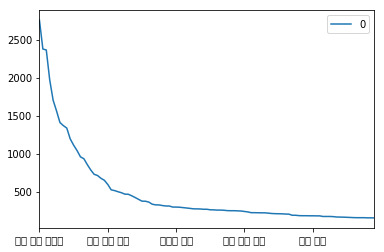

In [63]:
dist_pd_t = dist_pd.T
dist_sort = dist_pd_t.sort_values(by=0, ascending = False)
dist_sort.iloc[1:100, :].plot()

In [64]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

In [65]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(vocab, min_count=1)

model

2019-05-28 12:29:57,804 : INFO : 'pattern' package not found; tag filters are not available for English
2019-05-28 12:29:57,827 : INFO : collecting all words and their counts
2019-05-28 12:29:57,828 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2019-05-28 12:29:57,829 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-28 12:29:57,847 : INFO : PROGRESS: at sentence #10000, processed 69796 words, keeping 511 word types
2019-05-28 12:29:57,852 : INFO : collected 512 word types from a corpus of 79137 raw words and 11364 sentences
2019-05-28 12:29:57,853 : INFO : Loading a fresh vocabulary
2019-05-28 12:29:57,858 : INFO : effective_min_count=1 retains 512 unique words (100% of original 512, drops 0)
2019-05-28 12:29:57,860 : INFO : effective_min_count=1 leaves 79137 word corpus (100% of original 79137, drops 0)
2019-05-28 12:29:57,863 : INFO : deleting the raw counts dict

In [66]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

2019-05-28 12:30:13,124 : INFO : saving Word2Vec object under 1minwords, separately None
2019-05-28 12:30:13,125 : INFO : not storing attribute vectors_norm
2019-05-28 12:30:13,126 : INFO : not storing attribute cum_table
2019-05-28 12:30:13,126 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-28 12:30:13,133 : INFO : saved 1minwords


In [67]:
# 단어 사전 수
len(model.wv.vocab)

512

In [68]:
# 단어 사전에서 상위 10개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

[' ',
 '이',
 '점',
 '검',
 '스',
 '트',
 '시',
 '음',
 '어',
 '조',
 '생',
 '발',
 '치',
 '정',
 '인',
 '전',
 '상',
 '동',
 '등',
 '터',
 '불',
 '고',
 '량',
 '부',
 '교',
 '작',
 '환',
 '라',
 '확',
 '드']

In [69]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{' ': <gensim.models.keyedvectors.Vocab at 0x3476d6a0>,
 '이': <gensim.models.keyedvectors.Vocab at 0x3448ecc0>,
 '점': <gensim.models.keyedvectors.Vocab at 0x3449e2b0>,
 '검': <gensim.models.keyedvectors.Vocab at 0x3449e2e8>,
 '스': <gensim.models.keyedvectors.Vocab at 0x3448ef28>,
 '트': <gensim.models.keyedvectors.Vocab at 0x3449ed68>,
 '시': <gensim.models.keyedvectors.Vocab at 0x3448e978>,
 '음': <gensim.models.keyedvectors.Vocab at 0x3448ecf8>,
 '어': <gensim.models.keyedvectors.Vocab at 0x3448ef98>,
 '조': <gensim.models.keyedvectors.Vocab at 0x3449e1d0>,
 '생': <gensim.models.keyedvectors.Vocab at 0x3448ed68>,
 '발': <gensim.models.keyedvectors.Vocab at 0x3448ed30>,
 '치': <gensim.models.keyedvectors.Vocab at 0x3449e208>,
 '정': <gensim.models.keyedvectors.Vocab at 0x3449e748>,
 '인': <gensim.models.keyedvectors.Vocab at 0x3449e518>,
 '전': <gensim.models.keyedvectors.Vocab at 0x3448ea90>,
 '상': <gensim.models.keyedvectors.Vocab at 0x3448eb00>,
 '동': <gensim.models.keyedvectors.Vocab at 0x344

In [70]:
# 가장 적게 등장하는 단어
min(vocab, key=vocab.get)

'최'

In [72]:
model.wv['가니']

KeyError: "word '가니' not in vocabulary"

# tf-idf 가중치 적용

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

In [ ]:
# %%time 
train_feature_tfidf = transformer.fit_transform(train_feature_vector)
train_feature_tfidf.shape

In [ ]:
# # %%time 
test_feature_tfidf = transformer.fit_transform(test_feature_vector)
test_feature_tfidf.shape

# 머신러닝 : 학습 및 평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 분류기 사용
from sklearn.model_selection import GridSearchCV  # Grid Search로 하이퍼파라미터 서치 및 모델평가.

# 랜덤포레스트 분류기를 사용
rfc = RandomForestClassifier(random_state=42)

In [ ]:
# Grid Search로 초모수 찾기.
param_range = [100, 200, 300, 400, 500]
param_grid = {
    'bootstrap': [False, True],
    'n_estimators': param_range,
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=5)

In [ ]:
# y_label = df_train['result_pred']

In [ ]:
CV_rfc.fit(train_feature_tfidf, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
CV_rfc.best_score_

In [ ]:
forest = RandomForestClassifier(
    n_estimators = 300, n_jobs = -1, random_state=2018, bootstrap=False, criterion='entropy',
    max_depth=8, max_features='auto'
)

In [ ]:
forest = forest.fit(train_feature_tfidf, y_train)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

scoring = 'accuracy'
%time score = cross_val_score(forest, train_feature_vector, y_train, cv=k_fold, n_jobs=-1, scoring=scoring)
score

In [ ]:
round(np.mean(score)*100,2)

# 예측

In [ ]:
y_train_pred = forest.predict(train_feature_vector)
y_test_pred = forest.predict(test_feature_vector)

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))  